In [21]:
#Necessary Imports
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
import os
from torchvision import transforms

from tensorflow.keras.preprocessing.image import img_to_array


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [22]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#Loading data
from tensorflow.keras.utils import load_img

path = '/content/drive/MyDrive/Colab Notebooks/final/final/train'

train_x = []
train_y = []

# k = 0
label = 0

for i in os.listdir(path):
  
  folder_path = os.path.join(path,i)
  for j in os.listdir(folder_path):
    img = load_img(os.path.join(folder_path,j), target_size=(128,128))   # Loding image with target size
    img = img_to_array(img)
    train_x.append(img) 
    train_y.append(int(label))  #converting label in to integer
  label += 1
    # break
  # break
train_x = np.array(train_x)
train_y = np.array(train_y)



/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [5]:
print("shape of x_train: ", train_x.shape)
print("shape of x_train: ", train_y.shape)

shape of x_train:  (8690, 128, 128, 3)
shape of x_train:  (8690,)


In [6]:
from tensorflow.keras.utils import load_img

path = '/content/drive/MyDrive/Colab Notebooks/final/final/test'

test_x = []
test_y = []

label = 0
for i in os.listdir(path):
  
  folder_path = os.path.join(path,i)
  for j in os.listdir(folder_path):
    img = load_img(os.path.join(folder_path,j), target_size=(128,128))   #loding image with target size
    img = img_to_array(img)
    test_x.append(img) 
    test_y.append(int(label))   #converting label in to integer
  label += 1

test_x = np.array(test_x)
test_y = np.array(test_y)


In [7]:
print("shape of x_test: ", test_x.shape)
print("shape of x_test: ", test_y.shape)

shape of x_test:  (9509, 128, 128, 3)
shape of x_test:  (9509,)


In [8]:
#converting in to 1D Array
train_x /= 255.
test_x /= 255.

In [9]:
from sklearn.utils import shuffle

d = shuffle(train_x, train_y)   #shuffle data

In [10]:
from sklearn.model_selection import train_test_split
x = d[0]
y = d[1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=12)

In [11]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

In [12]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  MaxPooling2D,BatchNormalization,Dense,Flatten,Dropout

In [13]:
#Build the Model
model = Sequential([
    Flatten(),
    Dense(128, activation= 'relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

In [14]:
#Compile & Train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])   #calculates how often prediction equal lables

In [15]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
245/245 [==============================] - 12s 47ms/step - loss: 1.5337 - accuracy: 0.7172 - val_loss: 0.7013 - val_accuracy: 0.7457
Epoch 2/50
245/245 [==============================] - 12s 48ms/step - loss: 0.6860 - accuracy: 0.7521 - val_loss: 0.6681 - val_accuracy: 0.7135
Epoch 3/50
245/245 [==============================] - 12s 49ms/step - loss: 0.6358 - accuracy: 0.7672 - val_loss: 0.6413 - val_accuracy: 0.7514
Epoch 4/50
245/245 [==============================] - 12s 49ms/step - loss: 0.6592 - accuracy: 0.7482 - val_loss: 0.6283 - val_accuracy: 0.7664
Epoch 5/50
245/245 [==============================] - 12s 50ms/step - loss: 0.6285 - accuracy: 0.7555 - val_loss: 0.6648 - val_accuracy: 0.7158
Epoch 6/50
245/245 [==============================] - 12s 50ms/step - loss: 0.5984 - accuracy: 0.7693 - val_loss: 0.6203 - val_accuracy: 0.7526
Epoch 7/50
245/245 [==============================] - 12s 49ms/step - loss: 0.6061 - accuracy: 0.7633 - val_loss: 0.6268 - val_accuracy:

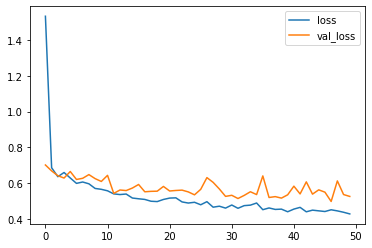

In [16]:
#Plotting Loss per Iteration
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

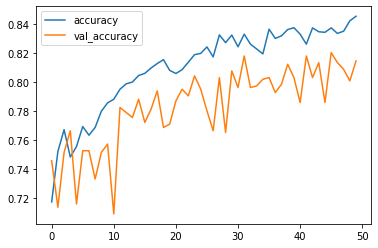

In [17]:
#Plotting Accuracy per Iteration
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [18]:
#Model Evaluation
print(model.evaluate(X_test, y_test))

28/28 [==============================] - 0s 14ms/step - loss: 0.5253 - accuracy: 0.8147
[0.5253239870071411, 0.8147295713424683]


Confusion matrix without normalization
[[ 28   5   0  40  15]
 [  3 508   0   0   5]
 [  0   1   0   4  22]
 [  2   4   0  92  19]
 [  4   4   0  33  80]]


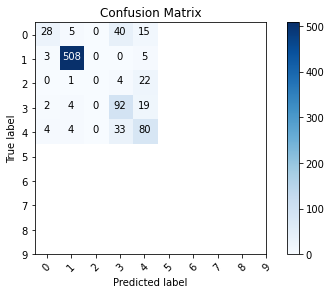

In [19]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Plotting few Places where the Model went wrong

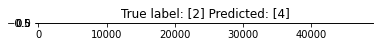

In [20]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
i = np.expand_dims(i, axis=0)
plt.imshow(X_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));